# **what we did in this data set**






*   first we imported libraries which are essaintial for this data set to analyse and train the model and we opened the dataset which is very huge it contains 10000rows and 21 columns
*   now we removed a column which is not required for our model
*  now we plot a graph to analyse no. of mens and womens
*   now we checked weather there are nul values or not and we got to know that there are so many null values
*   so we replaced null values with mean in numeric columns and with mode in categorial columns
*   after that we replaced categorical columns with numeric values
*   in that process we removed removed one row
*   now our data set is cleaned so we feed our data to model by 70:30 ratio as we used 70% data for trainng and 30% data for testing
*   after training the model ..its time for validating the model.so, we used accuracy_score and confusion matrix to validate our model
*   and finally,we got 79% accuracy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv("/content/Heart_Disease")
df

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,NaN,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,NaN,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [3]:
df.rename(columns={"Heart Disease Status":"target"},inplace=True)
df

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,target
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,NaN,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,NaN,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [4]:

df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [5]:
# df=df.drop(index=4)
# df=df.reset_index()


<Axes: xlabel='Gender', ylabel='count'>

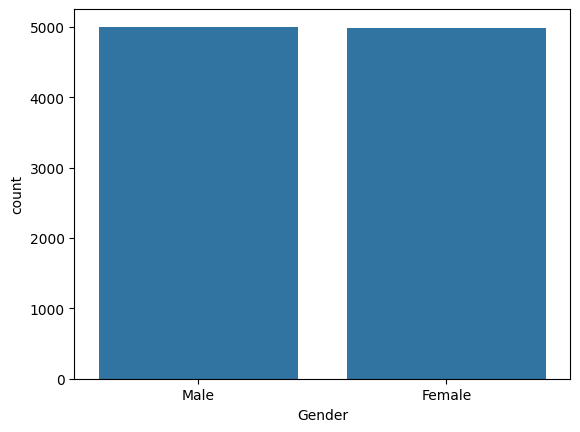

In [6]:
sns.countplot(data=df,x="Gender")

In [7]:
df["Gender"].mode()

,Gender
0,Male


In [8]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])

In [9]:
df["Gender"].isnull().sum()

np.int64(0)

In [10]:
df.isnull().sum()

,0
Age,29
Gender,0
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


<Axes: xlabel='Age', ylabel='Count'>

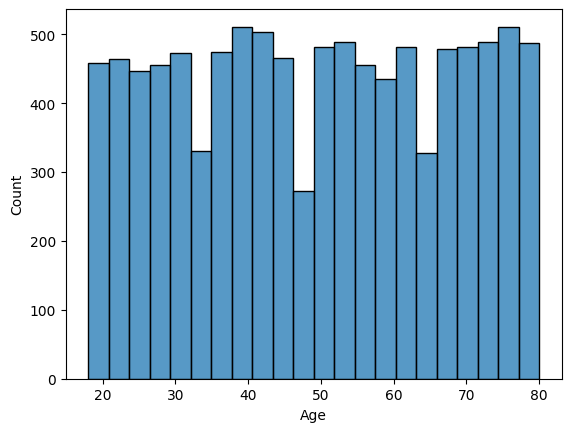

In [11]:
sns.histplot(data=df,x="Age")

In [12]:
df.describe()


,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [13]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

<ipython-input-13-993656b341a6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(),inplace=True)


In [14]:
df[["BMI","Sleep Hours","Triglyceride Level","Fasting Blood Sugar","CRP Level","Homocysteine Level"]]=df[["BMI","Sleep Hours","Triglyceride Level","Fasting Blood Sugar","CRP Level","Homocysteine Level"]].fillna(df[["BMI","Sleep Hours","Triglyceride Level","Fasting Blood Sugar","CRP Level","Homocysteine Level"]].mean())

In [15]:
df[["Age","Blood Pressure","Cholesterol Level"]]=df[["Age","Blood Pressure","Cholesterol Level"]].fillna(df[["Age","Blood Pressure","Cholesterol Level"]].mean())

In [16]:
df.isnull().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,0
High Blood Pressure,26


In [17]:
df.dtypes

,0
Age,float64
Gender,object
Blood Pressure,float64
Cholesterol Level,float64
Exercise Habits,object
Smoking,object
Family Heart Disease,object
Diabetes,object
BMI,float64
High Blood Pressure,object


In [18]:
df["Exercise Habits"].mode()


,Exercise Habits
0,High


In [19]:
df["Exercise Habits"].fillna("High",inplace=True)


<ipython-input-19-cd3d12f61e65>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Exercise Habits"].fillna("High",inplace=True)


In [20]:
df["Smoking"].mode()
#replacing one by one


,Smoking
0,Yes


In [21]:
df["Family Heart Disease"].mode()


,Family Heart Disease
0,No


In [22]:
df["Diabetes"].mode()


,Diabetes
0,No


In [23]:
df["High Blood Pressure"].mode()


,High Blood Pressure
0,Yes


In [24]:
df["Low HDL Cholesterol"].mode()


,Low HDL Cholesterol
0,Yes


In [25]:
df[["High LDL Cholesterol","Alcohol Consumption","Stress Level","Sugar Consumption"]].mode()
#this method is used for replacing with mode at a time unlike the last time which we replaced individually


,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sugar Consumption
0,No,Medium,Medium,Low


In [26]:
#df[["High LDL Cholesterol","Alcohol Consumption","Stress Level","Sugar Consumption"]]=df[["High LDL Cholesterol","Alcohol Consumption","Stress Level","Sugar Consumption"]].fillna(df[["High LDL Cholesterol","Alcohol Consumption","Stress Level","Sugar Consumption"]].mode())
df.loc[:, ["High LDL Cholesterol","Alcohol Consumption","Stress Level","Sugar Consumption"]] = df.loc[:, ["High LDL Cholesterol","Alcohol Consumption","Stress Level","Sugar Consumption"]].fillna(df[["High LDL Cholesterol","Alcohol Consumption","Stress Level","Sugar Consumption"]].mode().iloc[0])

In [27]:
df.isnull().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,0
High Blood Pressure,26


In [28]:
df.loc[:,["Smoking","Family Heart Disease","Diabetes","High Blood Pressure","Low HDL Cholesterol"]]=df.loc[:,["Smoking","Family Heart Disease","Diabetes","High Blood Pressure","Low HDL Cholesterol"]].fillna(df[["Smoking","Family Heart Disease","Diabetes","High Blood Pressure","Low HDL Cholesterol"]].mode().iloc[0])

In [29]:
df.isnull().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


In [30]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,target
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,120.142213,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.000000,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.000000,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.000000,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.000000,10.381259,8.153887,No


In [31]:
df[["Low HDL Cholesterol","High Blood Pressure"]]

,Low HDL Cholesterol,High Blood Pressure
0,Yes,Yes
1,Yes,No
2,Yes,No
3,No,Yes
4,No,Yes
...,...,...
9995,No,Yes
9996,No,Yes
9997,Yes,No
9998,No,Yes


In [32]:
df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'target'],
      dtype='object')

In [33]:
df["Gender"]=df["Gender"].map({"Female":1,"Male":0})

In [34]:
df["Smoking"]=df["Smoking"].map({"Yes":1,"No":0})

In [35]:
df["Family Heart Disease"]=df["Family Heart Disease"].map({"Yes":1,"No":0})

In [36]:
#df.loc[:,["Low HDL Cholesterol","High LDL Cholesterol"]]=df[["Low HDL Cholesterol","High LDL Cholesterol"]].replace({"Yes":1,"No":0}).astype(int)

#it is not converting dtype ,it is shoing as object which we cant use in data training

In [37]:
df["Diabetes"]=df["Diabetes"].map({"Yes":1,"No":0})

In [38]:
df["High Blood Pressure"]=df["High Blood Pressure"].map({"Yes":1,"No":0})

In [39]:
df["target"]=df["target"].map({"Yes":1,"No":0})

In [40]:
df["Low HDL Cholesterol"]=df["Low HDL Cholesterol"].map({"Yes":1,"No":0})

In [41]:
df["High LDL Cholesterol"]=df["High LDL Cholesterol"].map({"Yes":1,"No":0})

In [42]:
#df.loc[:,["Exercise Habits","Alcohol Consumption","Stress Level","Sugar Consumption"]]=df[["Exercise Habits","Alcohol Consumption","Stress Level","Sugar Consumption"]].replace({"Low":0,"Medium":1,"High":2})
#it is not converting dtype ,it is shoing as object which we cant use in data training

In [43]:
df["Sugar Consumption"]=df["Sugar Consumption"].map({"Low":0,"Medium":1,"High":2})

In [44]:
df["Stress Level"]=df["Stress Level"].map({"Low":0,"Medium":1,"High":2})

In [45]:
df["Alcohol Consumption"]=df["Alcohol Consumption"].map({"Low":0,"Medium":1,"High":2})

In [46]:
df["Exercise Habits"]=df["Exercise Habits"].map({"Low":0,"Medium":1,"High":2})

In [47]:
#df.loc[:,["Low HDL Cholesterol","High LDL Cholesterol"]]=df[["Low HDL Cholesterol","High LDL Cholesterol"]].replace({"Yes":1,"No":0}).astype(int)

#it is not converting dtype ,it is shoing as object which we cant use in data training

In [48]:
df.dtypes

,0
Age,float64
Gender,int64
Blood Pressure,float64
Cholesterol Level,float64
Exercise Habits,int64
Smoking,int64
Family Heart Disease,int64
Diabetes,int64
BMI,float64
High Blood Pressure,int64


In [49]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,target
0,56.0,0,153.0,155.0,2,1,1,0,24.991591,1,...,0,2,1,7.633228,1,342.0,120.142213,12.969246,12.387250,0
1,69.0,1,146.0,286.0,2,0,1,1,25.221799,0,...,0,1,2,8.744034,1,133.0,157.000000,9.355389,19.298875,0
2,46.0,0,126.0,216.0,0,0,0,0,29.855447,0,...,1,0,0,4.440440,0,393.0,92.000000,12.709873,11.230926,0
3,32.0,1,122.0,293.0,2,1,1,0,24.130477,1,...,1,0,2,5.249405,2,293.0,94.000000,12.509046,5.961958,0
4,60.0,0,166.0,242.0,0,1,1,1,20.486289,1,...,0,0,2,7.030971,2,263.0,154.000000,10.381259,8.153887,0


<Axes: xlabel='target', ylabel='count'>

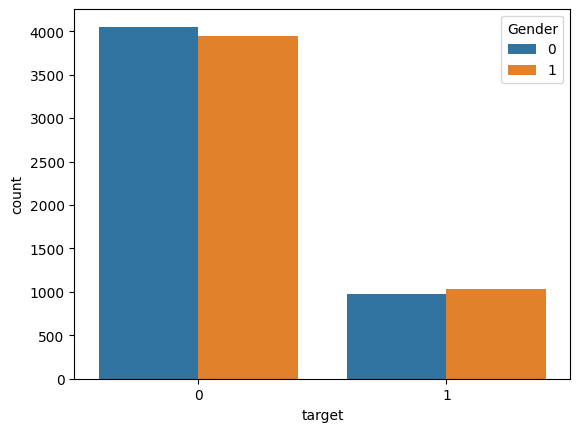

In [50]:
sns.countplot(data=df,x="target",hue="Gender")

<Axes: xlabel='Age', ylabel='target'>

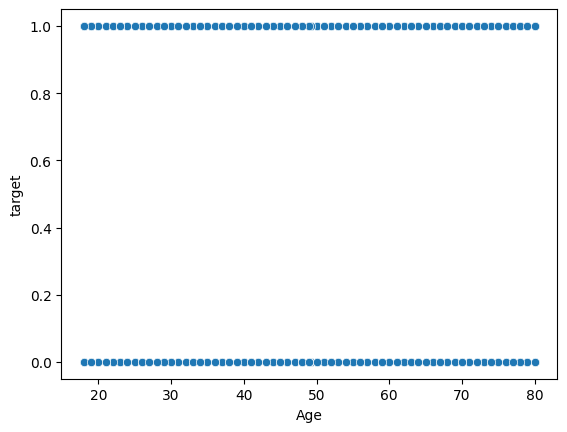

In [51]:
sns.scatterplot(data=df,x="Age",y="target")
#by seeing we can say its a binary so we have to use logistic method for training our model

In [52]:
X=df.drop("target",axis=1)
X
#separating features

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
0,56.0,0,153.0,155.0,2,1,1,0,24.991591,1,1,0,2,1,7.633228,1,342.0,120.142213,12.969246,12.387250
1,69.0,1,146.0,286.0,2,0,1,1,25.221799,0,1,0,1,2,8.744034,1,133.0,157.000000,9.355389,19.298875
2,46.0,0,126.0,216.0,0,0,0,0,29.855447,0,1,1,0,0,4.440440,0,393.0,92.000000,12.709873,11.230926
3,32.0,1,122.0,293.0,2,1,1,0,24.130477,1,0,1,0,2,5.249405,2,293.0,94.000000,12.509046,5.961958
4,60.0,0,166.0,242.0,0,1,1,1,20.486289,1,0,0,0,2,7.030971,2,263.0,154.000000,10.381259,8.153887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,1,136.0,243.0,1,1,0,0,18.788791,1,0,1,1,2,6.834954,1,343.0,133.000000,3.588814,19.132004
9996,38.0,0,172.0,154.0,1,0,0,0,31.856801,1,0,1,1,2,8.247784,0,377.0,83.000000,2.658267,9.715709
9997,73.0,0,152.0,201.0,2,1,0,1,26.899911,0,1,1,1,0,4.436762,0,248.0,88.000000,4.408867,9.492429
9998,23.0,0,142.0,299.0,0,1,0,1,34.964026,1,0,1,1,2,8.526329,1,113.0,153.000000,7.215634,11.873486


In [53]:
y=df["target"]
y
#separated target

,target
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,1
9998,1


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [56]:
print(X_train.shape)
print(X_test.shape)


(7000, 20)
(3000, 20)


In [57]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [58]:
model.fit(X_train,y_train)
#training our model

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
pred=model.predict(X_test)
#testing the model

In [71]:
from sklearn.metrics import accuracy_score
B=accuracy_score(y_test,pred)
B
#wow we got accuracy of 79% thats so nice

0.7973333333333333

In [61]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
cm

array([[2392,    0],
       [ 608,    0]])

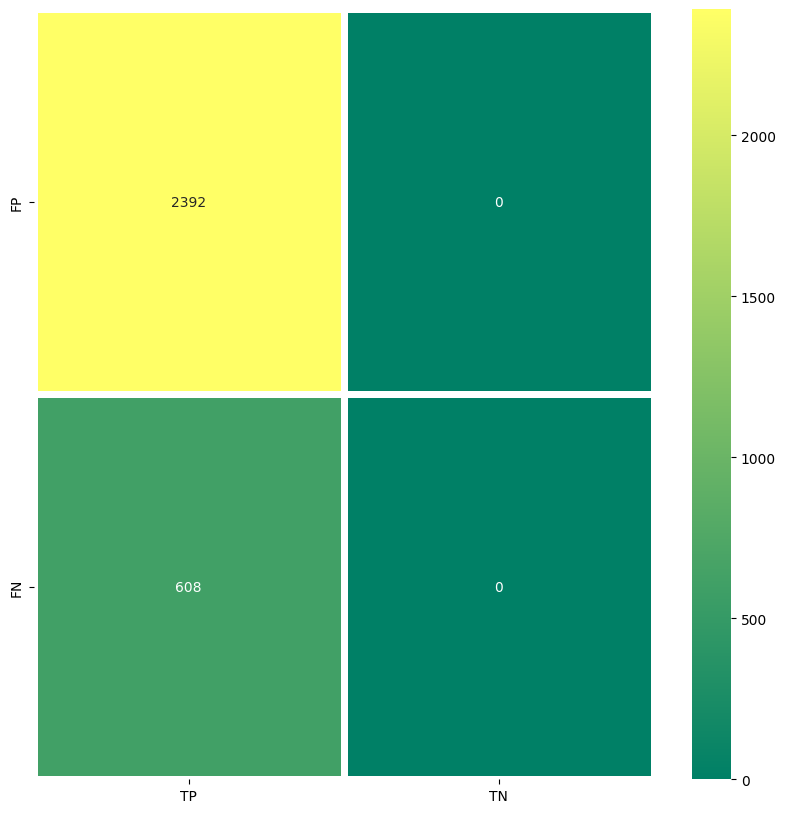

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt="d",linewidth=5,cmap="summer",xticklabels=["TP","TN"],yticklabels=["FP","FN"])
plt.title="confusion matrix"
plt.xlabel="predicted"
plt.show()
# some mistakes while naming

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
Model1=RandomForestClassifier()
Model1.fit(X_train,y_train)

RandomForestClassifier()

In [72]:
Pred1=Model1.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
A=accuracy_score(y_test,Pred1)
A

0.7973333333333333